In [3]:
from datetime import datetime
import tensorflow as tf
import numpy as np
import os
import time

%load_ext autoreload
%autoreload 2

from keras.utils import plot_model
from textgenrnn import textgenrnn
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
test_cuda = tf.constant("test cuda")
with tf.Session() as sess:
    print(tf.test.is_gpu_available(cuda_only=True))
    print(sess.run(test_cuda))

True
b'test cuda'


In [5]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

def plot_result(history):
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Baseline Setting
## 3-layer Basic LSTM network

In [6]:
model_cfg = {
    'word_level': True,   # set to True if want to train a word-level model (requires more data and smaller max_length)
    'rnn_size': 128,   # number of LSTM cells of each layer (128/256 recommended)
    'rnn_layers': 3,   # number of LSTM layers (>=2 recommended)
    'rnn_bidirectional': False,   # consider text both forwards and backward, can give a training boost
    'max_length': 15,   # number of tokens to consider before predicting the next (20-40 for characters, 5-10 for words recommended)
    'max_words': 10000,   # maximum number of words to model; the rest will be ignored (word-level model only)
    'use_attention': False
}

train_cfg = {
    'line_delimited': True,   # set to True if each text has its own line in the source file
    'num_epochs': 20,   # set higher to train the model for longer
    'gen_epochs': 5,   # generates sample text from model after given number of epochs
    'train_size': 0.8,   # proportion of input data to train on: setting < 1.0 limits model from learning perfectly
    'dropout': 0.0,   # ignore a random proportion of source tokens each epoch, allowing model to generalize better
    'validation': True,   # If train__size < 1.0, test on holdout dataset; will make overall training slower
    'is_csv': False   # set to True if file is a CSV exported from Excel/BigQuery/pandas
}

In [7]:
textgen = textgenrnn(config=model_cfg, name='trumpgen', new_model=True)
textgen.model.summary()
plot_model(textgen.model, show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 100)           46500     
_________________________________________________________________
rnn_1 (CuDNNLSTM)            (None, 15, 128)           117760    
_________________________________________________________________
rnn_2 (CuDNNLSTM)            (None, 15, 128)           132096    
_________________________________________________________________
rnn_3 (CuDNNLSTM)            (None, 128)               132096    
_________________________________________________________________
output (Dense)               (None, 465)               59985     
Total params: 488,437
Trainable params: 488,437
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = textgen.train_from_file(
    file_path="../data/just_tweet",
    new_model=True,
    num_epochs=train_cfg['num_epochs'],
    gen_epochs=train_cfg['gen_epochs'],
    batch_size=512,
    train_size=train_cfg['train_size'],
    dropout=train_cfg['dropout'],
    validation=train_cfg['validation'],
    is_csv=train_cfg['is_csv'],
    rnn_layers=model_cfg['rnn_layers'],
    rnn_size=model_cfg['rnn_size'],
    rnn_bidirectional=model_cfg['rnn_bidirectional'],
    max_length=model_cfg['max_length'],
    dim_embeddings=100,
    word_level=model_cfg['word_level']
)


14,685 texts collected.
Training new model w/ 3-layer, 128-cell LSTMs
Training on 311,238 word sequences.
Epoch 1/20
607/607 [==============================] - 23s 37ms/step - loss: 6.0745 - acc: 0.1136 - val_loss: 5.6075 - val_acc: 0.1569
Epoch 2/20
607/607 [==============================] - 21s 35ms/step - loss: 5.3183 - acc: 0.1786 - val_loss: 5.2601 - val_acc: 0.1946
Epoch 3/20
607/607 [==============================] - 22s 36ms/step - loss: 4.9310 - acc: 0.2067 - val_loss: 5.0801 - val_acc: 0.2123
Epoch 4/20
607/607 [==============================] - 22s 36ms/step - loss: 4.6574 - acc: 0.2252 - val_loss: 4.9928 - val_acc: 0.2234
Epoch 5/20
607/607 [==============================] - 22s 36ms/step - loss: 4.4438 - acc: 0.2397 - val_loss: 4.9658 - val_acc: 0.2278
####################
Temperature: 0.2
####################
the failing @nytimes is a great job for the u . s . a . !

i will be interviewed on @foxandfriends at 7 : 00 . enjoy !

. . . . . . . . . . . . . . . . . . . . . .



In [6]:
history = textgen.train_from_file(
    file_path="../data/just_tweet",
    new_model=True,
    num_epochs=train_cfg['num_epochs'],
    gen_epochs=train_cfg['gen_epochs'],
    batch_size=512,
    train_size=train_cfg['train_size'],
    dropout=train_cfg['dropout'],
    validation=train_cfg['validation'],
    is_csv=train_cfg['is_csv'],
    rnn_layers=model_cfg['rnn_layers'],
    rnn_size=model_cfg['rnn_size'],
    rnn_bidirectional=model_cfg['rnn_bidirectional'],
    max_length=model_cfg['max_length'],
    dim_embeddings=100,
    word_level=model_cfg['word_level']
)


14,685 texts collected.
Training new model w/ 3-layer, 128-cell LSTMs
Training on 314,129 word sequences.
Epoch 1/20
613/613 [==============================] - 23s 38ms/step - loss: 5.9094 - acc: 0.1297 - val_loss: 5.4588 - val_acc: 0.1740
Epoch 2/20
613/613 [==============================] - 23s 37ms/step - loss: 5.1590 - acc: 0.1910 - val_loss: 5.1675 - val_acc: 0.2023
Epoch 3/20
613/613 [==============================] - 22s 36ms/step - loss: 4.8122 - acc: 0.2148 - val_loss: 5.0291 - val_acc: 0.2154
Epoch 4/20
613/613 [==============================] - 22s 36ms/step - loss: 4.5657 - acc: 0.2312 - val_loss: 4.9657 - val_acc: 0.2226
Epoch 5/20
613/613 [==============================] - 22s 36ms/step - loss: 4.3640 - acc: 0.2444 - val_loss: 4.9379 - val_acc: 0.2284
####################
Temperature: 0.2
####################
the democrats are a great honor to welcome the u . s . a . g .

the fake news media is a total joke . i will be a great honor to welcome the u . s . a . g .

i will 

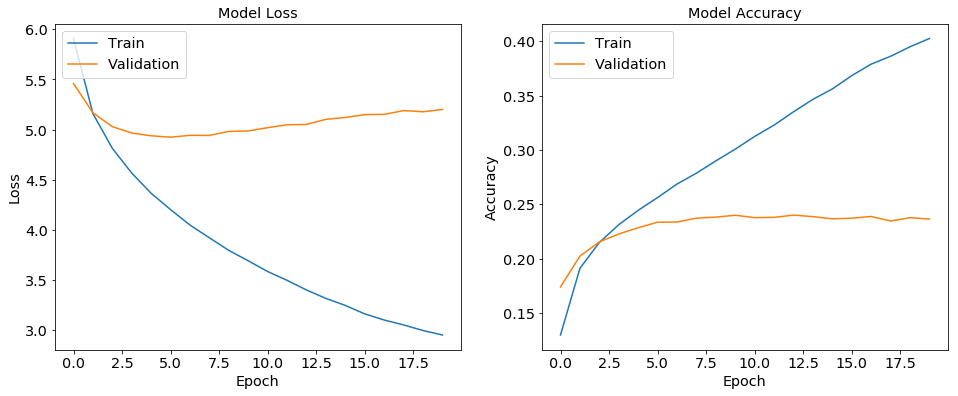

In [7]:
plot_result(history)

### Clean up the training set to exclude the overwhelming "I will be interviewed ..."

In [21]:
model_cfg = {
    'word_level': True,   # set to True if want to train a word-level model (requires more data and smaller max_length)
    'rnn_size': 128,   # number of LSTM cells of each layer (128/256 recommended)
    'rnn_layers': 3,   # number of LSTM layers (>=2 recommended)
    'rnn_bidirectional': False,   # consider text both forwards and backward, can give a training boost
    'max_length': 15,   # number of tokens to consider before predicting the next (20-40 for characters, 5-10 for words recommended)
    'max_words': 10000,   # maximum number of words to model; the rest will be ignored (word-level model only)
    'use_attention': False
}

train_cfg = {
    'line_delimited': True,   # set to True if each text has its own line in the source file
    'num_epochs': 20,   # set higher to train the model for longer
    'gen_epochs': 5,   # generates sample text from model after given number of epochs
    'train_size': 0.8,   # proportion of input data to train on: setting < 1.0 limits model from learning perfectly
    'dropout': 0.0,   # ignore a random proportion of source tokens each epoch, allowing model to generalize better
    'validation': True,   # If train__size < 1.0, test on holdout dataset; will make overall training slower
    'is_csv': False   # set to True if file is a CSV exported from Excel/BigQuery/pandas
}

In [27]:
textgen = textgenrnn(config=model_cfg, name='trumpgen', new_model=True)
textgen.model.summary()

start_time = time.time()
textgen.train_from_file(
    file_path="../data/just_tweet_without_I_will_be_interviewed",
    new_model=True,
    num_epochs=train_cfg['num_epochs'],
    gen_epochs=train_cfg['gen_epochs'],
    batch_size=512,
    train_size=train_cfg['train_size'],
    dropout=train_cfg['dropout'],
    validation=train_cfg['validation'],
    is_csv=train_cfg['is_csv'],
    rnn_layers=model_cfg['rnn_layers'],
    rnn_size=model_cfg['rnn_size'],
    rnn_bidirectional=model_cfg['rnn_bidirectional'],
    max_length=model_cfg['max_length'],
    dim_embeddings=100,
    word_level=model_cfg['word_level']
)
elapsed_time = time.time() - start_time
print("Time spent: ", elapsed_time, " seconds")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 100)           46500     
_________________________________________________________________
rnn_1 (CuDNNLSTM)            (None, 15, 128)           117760    
_________________________________________________________________
rnn_2 (CuDNNLSTM)            (None, 15, 128)           132096    
_________________________________________________________________
rnn_3 (CuDNNLSTM)            (None, 15, 128)           132096    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
output (Dense)               (None, 465)               893265    
Total para

Epoch 16/20
609/609 [==============================] - 27s 45ms/step - loss: 1.7766 - acc: 0.6101 - val_loss: 6.3615 - val_acc: 0.2046
Epoch 17/20
609/609 [==============================] - 27s 45ms/step - loss: 1.6819 - acc: 0.6322 - val_loss: 6.4255 - val_acc: 0.2059
Epoch 18/20
609/609 [==============================] - 27s 45ms/step - loss: 1.5980 - acc: 0.6511 - val_loss: 6.4503 - val_acc: 0.2027
Epoch 19/20
609/609 [==============================] - 27s 45ms/step - loss: 1.5339 - acc: 0.6664 - val_loss: 6.4626 - val_acc: 0.2023
Epoch 20/20
609/609 [==============================] - 27s 45ms/step - loss: 1.4780 - acc: 0.6799 - val_loss: 6.4951 - val_acc: 0.2053
####################
Temperature: 0.2
####################
i will be on @foxandfriends at 7 : 00 a . m . enjoy !

the united states has been reminded time and again . it will be a great evening ! will be a big crowd !

i will be on fox & friends at 7 . 00 . enjoy !

####################
Temperature: 0.5
####################

# Revise the hyperparameters

In [5]:
model_cfg = {
    'word_level': True,   # set to True if want to train a word-level model (requires more data and smaller max_length)
    'rnn_size': 256,   # number of LSTM cells of each layer (128/256 recommended)
    'rnn_layers': 3,   # number of LSTM layers (>=2 recommended)
    'rnn_bidirectional': True,   # consider text both forwards and backward, can give a training boost
    'max_length': 15,   # number of tokens to consider before predicting the next (20-40 for characters, 5-10 for words recommended)
    'max_words': 10000,   # maximum number of words to model; the rest will be ignored (word-level model only)
}

train_cfg = {
    'line_delimited': True,   # set to True if each text has its own line in the source file
    'num_epochs': 20,   # set higher to train the model for longer
    'gen_epochs': 5,   # generates sample text from model after given number of epochs
    'train_size': 0.8,   # proportion of input data to train on: setting < 1.0 limits model from learning perfectly
    'dropout': 0.0,   # ignore a random proportion of source tokens each epoch, allowing model to generalize better
    'validation': True,   # If train__size < 1.0, test on holdout dataset; will make overall training slower
    'is_csv': False   # set to True if file is a CSV exported from Excel/BigQuery/pandas
}

In [6]:
textgen = textgenrnn(name='trumpgen')
train_func = textgen.train_from_file

train_func(
    file_path="./just_tweet.csv",
    new_model=True,
    num_epochs=train_cfg['num_epochs'],
    gen_epochs=train_cfg['gen_epochs'],
    batch_size=512,
    train_size=train_cfg['train_size'],
    dropout=train_cfg['dropout'],
    validation=train_cfg['validation'],
    is_csv=train_cfg['is_csv'],
    rnn_layers=model_cfg['rnn_layers'],
    rnn_size=model_cfg['rnn_size'],
    rnn_bidirectional=model_cfg['rnn_bidirectional'],
    max_length=model_cfg['max_length'],
    dim_embeddings=100,
    word_level=model_cfg['word_level']
)

12,087 texts collected.
Training new model w/ 3-layer, 256-cell Bidirectional LSTMs
Training on 280,161 word sequences.
Epoch 1/20
547/547 [==============================] - 47s 86ms/step - loss: 13.0727 - val_loss: 6.2544
Epoch 2/20
547/547 [==============================] - 47s 85ms/step - loss: 5.5991 - val_loss: 5.1879
Epoch 3/20
547/547 [==============================] - 48s 89ms/step - loss: 4.7688 - val_loss: 4.8368
Epoch 4/20
547/547 [==============================] - 49s 90ms/step - loss: 4.2505 - val_loss: 4.7711
Epoch 5/20
547/547 [==============================] - 49s 90ms/step - loss: 3.7594 - val_loss: 4.9004
####################
Temperature: 0.2
####################
twitter web client , the appointment of the fbi official ” @ cnn & amp ; the u . k .

i will be interviewed on @ foxandfriends at 7 : 00 a . m . on @ foxnews . enjoy !

i will be interviewed by @ gstephanopoulos on @ foxnews at 7 : 00 a . m .

####################
Temperature: 0.5
####################
twitter

# Retrain after santizie the input dataset

In [4]:
model_cfg = {
    'word_level': True,   # set to True if want to train a word-level model (requires more data and smaller max_length)
    'rnn_size': 128,   # number of LSTM cells of each layer (128/256 recommended)
    'rnn_layers': 3,   # number of LSTM layers (>=2 recommended)
    'rnn_bidirectional': False,   # consider text both forwards and backward, can give a training boost
    'max_length': 10,   # number of tokens to consider before predicting the next (20-40 for characters, 5-10 for words recommended)
    'max_words': 10000,   # maximum number of words to model; the rest will be ignored (word-level model only)
}

train_cfg = {
    'line_delimited': True,   # set to True if each text has its own line in the source file
    'num_epochs': 20,   # set higher to train the model for longer
    'gen_epochs': 5,   # generates sample text from model after given number of epochs
    'train_size': 0.8,   # proportion of input data to train on: setting < 1.0 limits model from learning perfectly
    'dropout': 0.0,   # ignore a random proportion of source tokens each epoch, allowing model to generalize better
    'validation': True,   # If train__size < 1.0, test on holdout dataset; will make overall training slower
    'is_csv': False   # set to True if file is a CSV exported from Excel/BigQuery/pandas
}

In [5]:
textgen = textgenrnn(name='trumpgen')
train_func = textgen.train_from_file

train_func(
    file_path="./just_tweet.csv",
    new_model=True,
    num_epochs=train_cfg['num_epochs'],
    gen_epochs=train_cfg['gen_epochs'],
    batch_size=512,
    train_size=train_cfg['train_size'],
    dropout=train_cfg['dropout'],
    validation=train_cfg['validation'],
    is_csv=train_cfg['is_csv'],
    rnn_layers=model_cfg['rnn_layers'],
    rnn_size=model_cfg['rnn_size'],
    rnn_bidirectional=model_cfg['rnn_bidirectional'],
    max_length=model_cfg['max_length'],
    dim_embeddings=100,
    word_level=model_cfg['word_level']
)

12,083 texts collected.
Training new model w/ 3-layer, 128-cell LSTMs
Training on 266,442 word sequences.
Epoch 1/20
520/520 [==============================] - 19s 37ms/step - loss: 5.8346 - val_loss: 5.0284
Epoch 2/20
520/520 [==============================] - 18s 35ms/step - loss: 4.5971 - val_loss: 4.6535
Epoch 3/20
520/520 [==============================] - 18s 35ms/step - loss: 4.0402 - val_loss: 4.5950
Epoch 4/20
520/520 [==============================] - 18s 35ms/step - loss: 3.6051 - val_loss: 4.6056
Epoch 5/20
520/520 [==============================] - 18s 35ms/step - loss: 3.2203 - val_loss: 4.7148
####################
Temperature: 0.2
####################
the democrats are saying that the fake news media will be fired or not !

the democrats are in the high crime will be announced .

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

####################
Te